# Universidade Federal do Rio Grande do Norte
## Programa de Pós-graduação em Engenharia Elétrica e de Computação
### Course: Tópicos Especiais C
### Professor: Ivanovitch Silva
### Students: 
* Aguinaldo Bezerra Batista Júnior
* Pedro Klisley Ferreira da Silva
* Ycaro Ravel Dantas

#### Activity: Task 2, Project 1
#### Subject: Finding Patterns in Crime
#### Objectives: Perform data analysis of a given dataset following guidance and hints in the professor's notebook.
#### Dataset: MontgomeryCountyCrime2013.csv

### 1 Getting to know the proposed dataset

Loading the given dataset into Pandas object and showing some rows

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head()

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN


Listing the columns of the dataset and their types

In [3]:
crimes.columns

Index(['Incident ID', 'CR Number', 'Dispatch Date / Time', 'Class',
       'Class Description', 'Police District Name', 'Block Address', 'City',
       'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Start Date / Time', 'End Date / Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Address Number'],
      dtype='object')

In [4]:
crimes.dtypes

Incident ID                 int64
CR Number                   int64
Dispatch Date / Time       object
Class                       int64
Class Description          object
Police District Name       object
Block Address              object
City                       object
State                      object
Zip Code                  float64
Agency                     object
Place                      object
Sector                     object
Beat                       object
PRA                       float64
Start Date / Time          object
End Date / Time            object
Latitude                  float64
Longitude                 float64
Police District Number     object
Location                   object
Address Number            float64
dtype: object

By inspecting column names and some cells, we figured out some relations between some columns. Columns **"Police Distric Name"** and **"Police District Number"** stand for the same information: the identification of the Police District (Name or Code). Similarly, columns **"Class"** and **"Class Description"** refer to crime classes codes and their descriptions. **"Location"** is clearly a join of the information on **"Latitude"** and **"Longitude" columns**. A quick google search allowed to perceive the meaning of remaining non self-explanatory columns. **"CR Number"** refers to the Police Report Number, **"Beat"** stands for a police patrol area (subset of a Sector) and **"PRA"**, the Police Response Area, is a subset of Beat.



The column **"Zip Code"**, as already pointed in the guidance notebook, contains wrong type data. It is important to convert wrong or inadequate type data to more appropriate ones to help further analysis.

We could convert data in the **"Zip Code"** and **"Address Number"** columns to the more suitable interger type. However, these columns are full of _NaN_ and the lack of _NaN_ and _NA_ representations in integer columns is a well known Pandas "gotcha". Maybe thats why these columns were built as float type data (compatible with NAs and NaNs). A workaround to this problem could be the definition of a sentinel interger values for this kind of data absense.

NaNs and NAs are likeky to happen in a dataset during data acquisition, transmission and conversion steps. 
They negatively affect the quality of the dataset and they should be carefuly spotted and evaluated, as they may
lead to weak or innacurate conclusions.

### 2 Preparing Data

Converting some columns to more appropriate data types (see if it is really necessary)

Converting Date/Time data in columns **"Dispatch Date / Time"**, **"Start Date / Time"** and **"End Date / Time"**
from a generic Pandas object to a more convinient Date/Time Pandas object. This will allow the further extraction of date and time components easily. The resulting converted columns are going to be added right next to the original data columns.

In [5]:
crimes.insert(3, "datetime_Dispatch", pd.to_datetime(crimes["Dispatch Date / Time"]))

In [6]:
crimes.insert(17, "datetime_Start", pd.to_datetime(crimes["Start Date / Time"]))

In [7]:
crimes.insert(19, "datetime_End", pd.to_datetime(crimes["End Date / Time"]))

In [8]:
crimes.head()

,Incident ID,CR Number,Dispatch Date / Time,datetime_Dispatch,Class,Class Description,Police District Name,Block Address,City,State,...,PRA,Start Date / Time,datetime_Start,End Date / Time,datetime_End,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,2013-10-02 19:52:41,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,...,NaN,10/02/2013 07:52:00 PM,2013-10-02 19:52:00,NaN,NaT,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,2013-12-31 21:46:58,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,...,470.0,12/31/2013 09:46:00 PM,2013-12-31 21:46:00,NaN,NaT,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,2013-07-06 09:06:24,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,...,431.0,07/06/2013 09:06:00 AM,2013-07-06 09:06:00,NaN,NaT,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2013-07-28 21:13:15,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,...,11.0,07/28/2013 09:13:00 PM,2013-07-28 21:13:00,NaN,NaT,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2013-08-06 17:16:17,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,...,178.0,08/06/2013 05:16:00 PM,2013-08-06 17:16:00,NaN,NaT,NaN,NaN,2D,NaN,NaN


Our dataset contains a list of crimes registered between the months of july and december in 2013. Now that we have the columns in the appropriate format, we can sort the values by date. Using the column **'Dispatch Date / Time'**:

In [9]:
crimes.sort_values('Dispatch Date / Time').head()

,Incident ID,CR Number,Dispatch Date / Time,datetime_Dispatch,Class,Class Description,Police District Name,Block Address,City,State,...,PRA,Start Date / Time,datetime_Start,End Date / Time,datetime_End,Latitude,Longitude,Police District Number,Location,Address Number
18,200925991,13030553,07/01/2013 01:03:17 AM,2013-07-01 01:03:17,2812,DRIVING UNDER THE INFLUENCE,SILVER SPRING,8700 PLYMOUTH ST,SILVER SPRING,MD,...,126.0,07/01/2013 01:03:00 AM,2013-07-01 01:03:00,NaN,NaT,38.999406,-77.007736,3D,"(38.999406266117461, -77.007735832110484)",8700.0
15,200925984,13030556,07/01/2013 01:25:48 AM,2013-07-01 01:25:48,2623,SUICIDE-ATTEMPT-POISON/OVERDOSE,SILVER SPRING,2200 CLARK PL,SILVER SPRING,MD,...,175.0,07/01/2013 01:25:00 AM,2013-07-01 01:25:00,NaN,NaT,39.017814,-77.047689,3D,"(39.017814078946948, -77.04768926351224)",2200.0
63,200926057,13030657,07/01/2013 01:29:14 PM,2013-07-01 13:29:14,617,LARCENY FROM BUILDING OVER $200,SILVER SPRING,8200 FENTON ST,SILVER SPRING,MD,...,93.0,06/28/2013 04:45:00 PM,2013-06-28 16:45:00,NaN,NaT,38.991743,-77.024043,3D,"(38.991742503465268, -77.02404349079022)",8200.0
65,200926059,13030660,07/01/2013 01:29:22 PM,2013-07-01 13:29:22,2938,POL INFORMATION,MONTGOMERY VILLAGE,700 CLOPPER RD,GAITHERSBURG,MD,...,555.0,06/28/2013 06:00:00 PM,2013-06-28 18:00:00,06/28/2013 07:00:00 PM,2013-06-28 19:00:00,39.143717,-77.223842,6D,"(39.143716826007477, -77.2238423722319)",700.0
72,200926068,13030662,07/01/2013 01:39:35 PM,2013-07-01 13:39:35,1014,FORGERY/CNTRFT-ALL OTHER,BETHESDA,9800 MONTAUK AVE,BETHESDA,MD,...,194.0,06/24/2013 01:00:00 PM,2013-06-24 13:00:00,07/01/2013 01:00:00 PM,2013-07-01 13:00:00,39.016598,-77.129364,2D,"(39.016598405561517, -77.129363757226471)",9800.0


And using the column **'Start Date / Time'**:

In [10]:
crimes.sort_values('Start Date / Time').head()

,Incident ID,CR Number,Dispatch Date / Time,datetime_Dispatch,Class,Class Description,Police District Name,Block Address,City,State,...,PRA,Start Date / Time,datetime_Start,End Date / Time,datetime_End,Latitude,Longitude,Police District Number,Location,Address Number
10484,200938024,13045759,09/25/2013 08:27:18 PM,2013-09-25 20:27:18,2013,FAMILY OFFENSE - ABUSE/CHILD,SILVER SPRING,9200 KINGSBURY DR,SILVER SPRING,MD,...,117.0,01/01/1985 06:00:00 AM,1985-01-01 06:00:00,12/31/1990 11:30:00 PM,1990-12-31 23:30:00,39.004660,-77.021851,3D,"(39.004660203241308, -77.021851401891453)",9200.0
20891,200949682,13060292,12/16/2013 07:39:31 AM,2013-12-16 07:39:31,2013,FAMILY OFFENSE - ABUSE/CHILD,GERMANTOWN,19000 HIGHSTREAM DR,GERMANTOWN,MD,...,596.0,01/01/1997 12:01:00 AM,1997-01-01 00:01:00,12/31/1998 11:59:00 PM,1998-12-31 23:59:00,39.170986,-77.286440,5D,"(39.170985984960303, -77.28644024756737)",19000.0
8638,200935931,13040835,08/29/2013 11:56:45 AM,2013-08-29 11:56:45,2013,FAMILY OFFENSE - ABUSE/CHILD,WHEATON,12700 VEIRS MILL RD,ROCKVILLE,MD,...,339.0,01/01/1999 01:01:00 AM,1999-01-01 01:01:00,12/31/2001 01:01:00 AM,2001-12-31 01:01:00,39.064558,-77.097191,4D,"(39.064557709468289, -77.097190838951619)",12700.0
10646,200938204,13033703,07/19/2013 11:13:47 AM,2013-07-19 11:13:47,2013,FAMILY OFFENSE - ABUSE/CHILD,ROCKVILLE,800 BOWIE RD,ROCKVILLE,MD,...,260.0,01/01/2001 01:00:00 AM,2001-01-01 01:00:00,12/31/2011 12:00:00 AM,2011-12-31 00:00:00,39.074956,-77.149421,1D,"(39.074956028321907, -77.14942069804772)",800.0
4028,200930688,13036892,08/06/2013 06:58:05 PM,2013-08-06 18:58:05,2013,FAMILY OFFENSE - ABUSE/CHILD,ROCKVILLE,7300 CALHOUN PL,ROCKVILLE,MD,...,281.0,01/01/2001 12:00:00 AM,2001-01-01 00:00:00,12/31/2003 12:00:00 AM,2003-12-31 00:00:00,39.107938,-77.148110,1D,"(39.107938144546871, -77.148110003940658)",7300.0


### 3 Analyzing the times of crimes

For making assumptions about dates and times of crimes, we have to look deeper in to the Date/Time columns
we had just converted to a convinient datetime format from Pandas. By this conversion, it is possible to access all  the building parts of Date/Time informations (date, time, day, month, hour, minute, etc.) and make interesting computations.

First, for explanatory analysis, we can count the number of crimes dispatched each day and the number of crimes started each day and see it over the time.

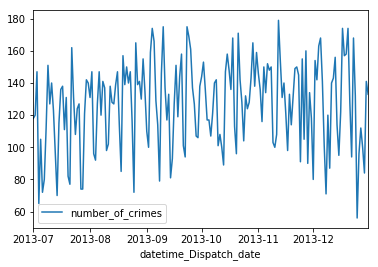

In [11]:
crimes['number_of_crimes']=1
crimes['datetime_Dispatch_date']=crimes['datetime_Dispatch'].dt.date
crimes.groupby(by='datetime_Dispatch_date',as_index=False).sum()[['datetime_Dispatch_date','number_of_crimes']].plot(x='datetime_Dispatch_date', y='number_of_crimes')

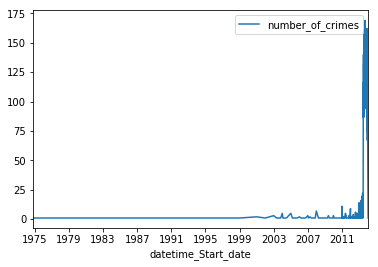

In [12]:
crimes['number_of_crimes']=1
crimes['datetime_Start_date']=crimes['datetime_Start'].dt.date
crimes.groupby(by='datetime_Start_date',as_index=False).sum()[['datetime_Start_date','number_of_crimes']].plot(x='datetime_Start_date', y='number_of_crimes')

As we can see, while the "Dispatch Date / Time" column contains only dates in 2013, the "Start Date / Time" column contains dates from a broader interval. Let's take a look:

In [13]:
# 5 first values of 'Dispatch Date / Time' column, sorted by date
crimes.sort_values('datetime_Dispatch_date')['Dispatch Date / Time'].head()

90    07/01/2013 06:01:04 PM
94    07/01/2013 06:16:56 PM
93    07/01/2013 04:21:33 PM
92    07/01/2013 05:37:49 PM
91    07/01/2013 03:22:15 PM
Name: Dispatch Date / Time, dtype: object

In [14]:
# 5 first values of 'Dispatch Date / Time' column, sorted (descending order) by date
crimes.sort_values('datetime_Dispatch_date',ascending=False)['Dispatch Date / Time'].head()

22876    12/31/2013 07:16:38 PM
22906    12/31/2013 01:44:20 PM
22920    12/31/2013 05:29:13 PM
22774    12/31/2013 12:29:00 AM
22775    12/31/2013 01:58:13 AM
Name: Dispatch Date / Time, dtype: object

In [15]:
# 5 first values of 'Dispatch Date / Time' and 'Class Description' columns, sorted by date
crimes.sort_values('datetime_Start_date')[['Start Date / Time','Class Description']].head()

,Start Date / Time,Class Description
15953,10/30/1974 12:00:00 AM,FAMILY OFFENSE - ABUSE/CHILD
17470,02/11/1977 12:00:00 AM,FAMILY OFFENSE - ABUSE/CHILD
23313,08/24/1980 12:00:00 AM,FAMILY OFFENSE - ABUSE/CHILD
10484,01/01/1985 06:00:00 AM,FAMILY OFFENSE - ABUSE/CHILD
17461,08/27/1993 12:00:00 AM,FAMILY OFFENSE - ABUSE/CHILD


In [16]:
# 5 first values of 'Dispatch Date / Time' and 'Class Description' columns, sorted (descending order) by date
crimes.sort_values('datetime_Start_date', ascending=False)[['Start Date / Time','Class Description']].head()

,Start Date / Time,Class Description
23323,01/25/2014 03:00:00 PM,EX PARTE/PROTECT. ORDER VIOL.
22925,12/31/2013 05:15:00 AM,BURG FORCE-RES/TIME UNK
22852,12/31/2013 01:51:00 PM,LARCENY SHOPLIFTING $50 - $199
22855,12/31/2013 01:33:00 AM,SIMPLE ASSAULT - PO
22856,12/31/2013 03:24:00 PM,SUDDEN DEATH NATURAL


The "Start Date / Time" column contains dates from the 70's, 80's, 90's and even one in 2014. Although we can have crimes committed a long time ago and denounced only in 2013, the exact date and time of this old crimes are uncertain. As we can see, most of them were registered with Start Date in the first day of the month and a rounded Time. So, for our analysis about the dates and times of the crimes, let's consider only the crimes started between July and December 2013. For that, we will create a "window" in the dataset.

In [17]:
from datetime import datetime
crimes_window = crimes[(crimes['datetime_Start_date']>=datetime.strptime('Jul 01 2013','%b %d %Y').date()) & (crimes['datetime_Start_date']<=datetime.strptime('Dec 31 2013','%b %d %Y').date())]
print(crimes.shape)
print(crimes_window.shape)

(23369, 28)
(22530, 28)


So, now we can easily figure out what day of the week are the most crimes committed on:

Friday       3584
Tuesday      3354
Wednesday    3301
Thursday     3243
Saturday     3204
Monday       3036
Sunday       2808
Name: datetime_Start, dtype: int64


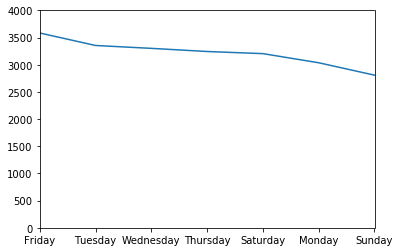

In [18]:
print(crimes_window.datetime_Start.dt.weekday_name.value_counts())
crimes_window.datetime_Start.dt.weekday_name.value_counts().plot(ylim=[0,4000])

In [19]:
print(crimes_window.datetime_Start.dt.weekday_name.value_counts(normalize=True))

Friday       0.159077
Tuesday      0.148868
Wednesday    0.146516
Thursday     0.143941
Saturday     0.142210
Monday       0.134754
Sunday       0.124634
Name: datetime_Start, dtype: float64


By this day of week crime ranking we can say that **Friday** is the day that most crimes occurred.

As the datetime object of Pandas does not provide time in part of day format (morning, afternoon, etc.), we could
write a little function to map the time crimes occur in part of day strings:

In [20]:
from datetime import time
from datetime import datetime

morning_start = time(6)
afternoon_start = time(12)
evening_start = time(18)
evening_end = time(23,59)
dawn_start = time(0)

def part_of_day(t):
    if morning_start <= t < afternoon_start:
        return 'morning'
    if afternoon_start <= t < evening_start:
        return 'afternoon'
    if evening_start <= t <= evening_end:
        return 'evening'
    if dawn_start <= t < morning_start:
        return 'dawn'
    
    return 'unknown'

And apply it to the **"datetime_Start"** column, placing the results as a new column of the dataset.

In [21]:
crimes_window['crimes_period'] = crimes_window.datetime_Start.dt.time.apply(part_of_day)
crimes_window[['datetime_Start','crimes_period']].head()

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,datetime_Start,crimes_period
0,2013-10-02 19:52:00,evening
1,2013-12-31 21:46:00,evening
2,2013-07-06 09:06:00,morning
3,2013-07-28 21:13:00,evening
4,2013-08-06 17:16:00,afternoon


From this little computation, it is possible to discover what time of day are the most crimes committed:

evening      7521
afternoon    6843
dawn         4284
morning      3882
Name: crimes_period, dtype: int64


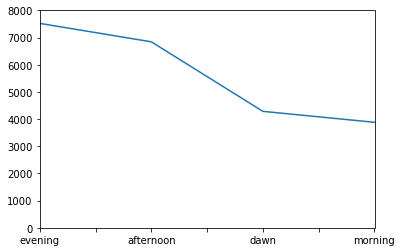

In [22]:
print(crimes_window.crimes_period.value_counts())
crimes_window.crimes_period.value_counts().plot(ylim=[0, 8000])

In [23]:
crimes_window.crimes_period.value_counts(normalize=True)

evening      0.333822
afternoon    0.303728
dawn         0.190146
morning      0.172304
Name: crimes_period, dtype: float64

Not surprisingly, the time of the day most crimes occurred is the **evening**.

Similarly, we can point out which month crimes were more likely to occur in 2013:

10    3963
8     3941
9     3857
11    3808
12    3532
7     3429
Name: datetime_Start, dtype: int64


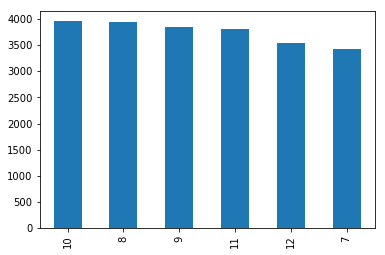

In [24]:
print(crimes_window.datetime_Start.dt.month.value_counts())
crimes_window.datetime_Start.dt.month.value_counts().plot(kind='bar')

So, **October** was the most quantitatively violent month.

In [25]:
crimes_window.groupby(by='datetime_Start_date',as_index=False).sum()[['datetime_Start_date', 'number_of_crimes']].sort_values('number_of_crimes').head()

,datetime_Start_date,number_of_crimes
177,2013-12-25,67
161,2013-12-09,76
160,2013-12-08,81
182,2013-12-30,83
153,2013-12-01,83


In [26]:
crimes_window.groupby(by='datetime_Dispatch_date',as_index=False).sum()[['datetime_Dispatch_date', 'number_of_crimes']].sort_values('number_of_crimes').head()

,datetime_Dispatch_date,number_of_crimes
0,2013-07-01,52
177,2013-12-25,56
3,2013-07-04,59
13,2013-07-14,68
5,2013-07-06,70


### 4 Analyzing locations of crimes

There are a few columns that encode information about the location of crimes:

- <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Block Address</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Sector</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Beat</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Police District Number</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Location</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Address Number</span>

In [27]:
location_columns = ['Police District Name','Block Address','Zip Code','Sector','Beat',
                    'Latitude','Longitude','Police District Number','Location',
                    'Address Number']

These columns have varying numbers of missing values, and varying granularity. Some of the columns represent areas with large granularity (like police districts), whereas some represent areas with small granularity, like <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>, and <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>.


In order to decide which column to use to analyze the locations of crimes, you need to utilize the following criteria:

- **Granularity**. Areas that are too small aren't great, because only a few crimes were committed inside them, which makes it hard to analyze and compare. For example, if I tell you that Silver Spring (a city in Montgomery County) is the place with the most crimes, you'll know to avoid that area. However, if I tell you that a 100 foot section of Silver Spring has the most crimes, it won't be as helpful (it's unlikely that you'll ever be in that 100 foot section).

In [28]:
for column in location_columns:
    count = crimes[column].value_counts().count()
    print(column, ": ", count)

Police District Name :  8
Block Address :  8143
Zip Code :  49
Sector :  15
Beat :  42
Latitude :  8065
Longitude :  8065
Police District Number :  8
Location :  8065
Address Number :  286


In [29]:
pol_dist_relation = crimes.groupby(["Police District Name"])["Police District Number"].value_counts()
print(pol_dist_relation)

Police District Name  Police District Number
BETHESDA              2D                        3383
GERMANTOWN            5D                        2755
MONTGOMERY VILLAGE    6D                        3812
OTHER                 OTHER                        8
ROCKVILLE             1D                        3480
SILVER SPRING         3D                        5533
TAKOMA PARK           TPPD                        23
WHEATON               4D                        4375
Name: Police District Number, dtype: int64


We will check the granularity of the columns by the different values count of each column.
Limiting to variables with less than 50 different values, we will got these variables:

- Police District Name :  8  
- Zip Code :  49
- Sector :  15
- Beat :  42
- Police District Number :  8

From this analysis, the **Police District Name** and **Police District Number** are the variables with the best granularity for this problem, since both have few different values, but not too few.

- **Comprehensibility**. You looked up the Police District map of Montgomery County before, so it's simple to tell what area corresponds to district <span style="background-color: #F9EBEA; color:##C0392B">6</span>. However, what area does Beat <span style="background-color: #F9EBEA; color:##C0392B">5M1</span> correspond to? You may be able to look this up, but it's harder to comprehend.

In [30]:
for column in location_columns:
    result = crimes[column].value_counts().head().index
    print(column, ": ", result)

Police District Name :  Index(['SILVER SPRING', 'WHEATON', 'MONTGOMERY VILLAGE', 'ROCKVILLE',
       'BETHESDA'],
      dtype='object')
Block Address :  Index(['11100  VEIRS MILL RD', '700  RUSSELL AVE', '100  EDISON PARK DR',
       '7100  DEMOCRACY BLVD', '12000  CHERRY HILL RD'],
      dtype='object')
Zip Code :  Float64Index([20910.0, 20904.0, 20902.0, 20877.0, 20874.0], dtype='float64')
Sector :  Index(['A', 'G', 'I', 'P', 'D'], dtype='object')
Beat :  Index(['3G1', '3I1', '4L2', '1A3', '3I2'], dtype='object')
Latitude :  Float64Index([39.0373858785, 39.1506767386, 39.111781485, 39.0219752112,
              39.0526973055],
             dtype='float64')
Longitude :  Float64Index([-77.0516359828, -77.2040589532, -77.2352805179, -77.1466424589,
              -76.9531784238],
             dtype='float64')
Police District Number :  Index(['3D', '4D', '6D', '1D', '2D'], dtype='object')
Location :  Index(['(39.037385878480961, -77.051635982808946)',
       '(39.150676738601661, -77.20405

Observing the values of these columns, the **Police District Name** is the variable tha is most comprehensible, since we can know where the facts ocurred without any mapping.

- **Missing values**. If a column has a lot of missing values, that means that the conclusions you draw are less valid, because you don't know if the missing data is systematic (ie all data for a given district is missing) or random (equal amounts of data are missing from each district). You should try to select a column that has minimal missing values.

In [31]:
#Missing values
location_columns = ['Police District Name','Block Address','Zip Code','Sector','Beat',
                    'Latitude','Longitude','Police District Number','Location',
                    'Address Number']
crimes[location_columns].isnull().sum()

Police District Name        0
Block Address               0
Zip Code                   30
Sector                     46
Beat                        8
Latitude                  161
Longitude                 161
Police District Number      0
Location                  161
Address Number            132
dtype: int64

Observing the missing values of these columns, the **Police District Name**, **Block address**, **Beat** and **Police District Number** are the variables with less missing values.

Combining the granularity, comprehensibility and missing values criteria, we choose the variable **Police District Name** because it was best evaluated on these 3 aspects.

After choose the location variable to use, we could answer these questions:

- In what area did the most crimes occur? What physical locations (like cities) does this area correspond to?

In [32]:
print("Incident ID Null: ", crimes['Incident ID'].isnull().sum())

crimes_count = crimes.groupby(["Police District Name"])['Police District Number'].value_counts()
print (crimes_count.sort_values(ascending=False))

Incident ID Null:  0
Police District Name  Police District Number
SILVER SPRING         3D                        5533
WHEATON               4D                        4375
MONTGOMERY VILLAGE    6D                        3812
ROCKVILLE             1D                        3480
BETHESDA              2D                        3383
GERMANTOWN            5D                        2755
TAKOMA PARK           TPPD                        23
OTHER                 OTHER                        8
Name: Police District Number, dtype: int64


In [33]:
crimes.groupby(["Police District Name"])['City'].value_counts()

Police District Name  City              
BETHESDA              BETHESDA              1736
                      ROCKVILLE              534
                      CHEVY CHASE            496
                      KENSINGTON             275
                      POTOMAC                162
                      SILVER SPRING          158
                      CABIN JOHN              18
                      GLEN ECHO                4
GERMANTOWN            GERMANTOWN            2128
                      DAMASCUS               229
                      CLARKSBURG             173
                      GAITHERSBURG           119
                      BOYDS                   86
                      DICKERSON                7
                      BARNESVILLE              4
                      MOUNT AIRY               3
                      BROOKEVILLE              2
                      DERWOOD                  2
                      MONTGOMERY VILLAGE       1
                      POOLES

Silverspring is the area where the most crimes occur. It correspond to the area with the cities **SILVER SPRING, BURTONSVILLE, TAKOMA PARK, SPENCERVILLE, CHEVY CHASE, LAUREL**  

#### Crimes per Capita

We used the [2015 crime annual report](https://www.montgomerycountymd.gov/POL/Resources/Files/crime/MCP2015AnnualCrimeReportFINAL.pdf) to get the population per district and used this values as the 2013 population per district. As 'Other' and 'Tahoma Park' is not directly related to one of the six districts, we will desconsider these Police Districts.

In [34]:
pop_per_dist = {'ROCKVILLE': 149118, 
                'BETHESDA': 182883,
                'SILVER SPRING': 152991,
                'WHEATON': 208283,
                'GERMANTOWN': 131391,
                'MONTGOMERY VILLAGE': 147486}
df_pop_per_dist = pd.Series(pop_per_dist)


crimes_per_dist = crimes_count[df_pop_per_dist.index.values.tolist()]
crimes_per_capita = crimes_per_dist.divide(df_pop_per_dist, level=0)

print(df_pop_per_dist)
print(crimes_per_dist)
print(crimes_per_capita.sort_values(ascending=False))

BETHESDA              182883
GERMANTOWN            131391
MONTGOMERY VILLAGE    147486
ROCKVILLE             149118
SILVER SPRING         152991
WHEATON               208283
dtype: int64
Police District Name  Police District Number
BETHESDA              2D                        3383
GERMANTOWN            5D                        2755
MONTGOMERY VILLAGE    6D                        3812
ROCKVILLE             1D                        3480
SILVER SPRING         3D                        5533
WHEATON               4D                        4375
Name: Police District Number, dtype: int64
Police District Name  Police District Number
SILVER SPRING         3D                        0.036166
MONTGOMERY VILLAGE    6D                        0.025847
ROCKVILLE             1D                        0.023337
WHEATON               4D                        0.021005
GERMANTOWN            5D                        0.020968
BETHESDA              2D                        0.018498
dtype: float64


Silverspring has the highest number of crimes per capita (0.036 crimes per capita) and Bethesda has the lowest number (0.018 crimes per capita).

### 5 Analyzing types of crime

To make a deeper analysis about the crime categories listed in the events, it is necessary to account crime categories in the dataset by aggregating categories in rows and accounting the frequencies for crime categories. We can first check the crime class variety:

In [35]:
crimes.groupby(['Class','Class Description'],as_index=False).sum()[['Class','Class Description']]

,Class,Class Description
0,111,HOMICIDE-FIREARM
1,115,HOMICIDE-OTHER
2,211,RAPE-FORCE
3,212,RAPE - ATTEMPT - FORCE
4,311,ROB FIREARM - STREET
5,312,ROB FIREARM - COMMERCIAL
6,313,ROB FIREARM - GAS/SVC STA
7,314,ROB FIREARM - CONV. STORE
8,315,ROB FIREARM - RESIDENTIAL
9,316,ROB FIREARM - FINANCIAL INSTITUTION


The above table shows that there are **285** crimes classes in the dataset, alongside with their respective descriptions. A brief observation of these descriptions shows that not all occurrencies are directly or closely related to crimes. This makes us believe that the provided dataset does not list only crimes but rather police reports. Anyway, an interesting next step is to account the frequencies for each crime class:

In [36]:
print(crimes['Class Description'].value_counts().head())

DRIVING UNDER THE INFLUENCE        1710
CDS-POSS MARIJUANA/HASHISH         1334
POL INFORMATION                    1191
LARCENY FROM AUTO OVER $200         914
LARCENY FROM BUILDING OVER $200     895
Name: Class Description, dtype: int64


In [37]:
print(crimes['Class Description'].value_counts(normalize=True).head())

DRIVING UNDER THE INFLUENCE        0.073174
CDS-POSS MARIJUANA/HASHISH         0.057084
POL INFORMATION                    0.050965
LARCENY FROM AUTO OVER $200        0.039112
LARCENY FROM BUILDING OVER $200    0.038299
Name: Class Description, dtype: float64


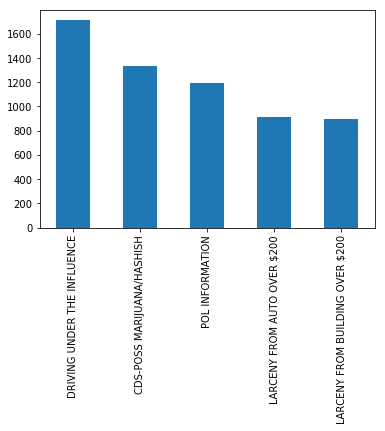

In [38]:
crimes['Class Description'].value_counts().head().plot(kind='bar')

Thus, the most frequent police event in 2013 was **"DRIVING UNDER THE INFLUENCE"** (of alcohol or narcotic substances, probably) and events such as **"VANDALISM GRAFFITI CHURCH/TEMP"** are the least frequent (among much others).


The descriptions of crime classes are rich in words, thus, based in this words, we can make assumptions about the
presence of violence in this crimes. To accomplish this, it is needed to take a look in to these descriptions and
select some words related to violence to build a dictionary or seach pattern.

To do so, a good strategy is to build a word cloud from crime descriptions and select some violece-related words:

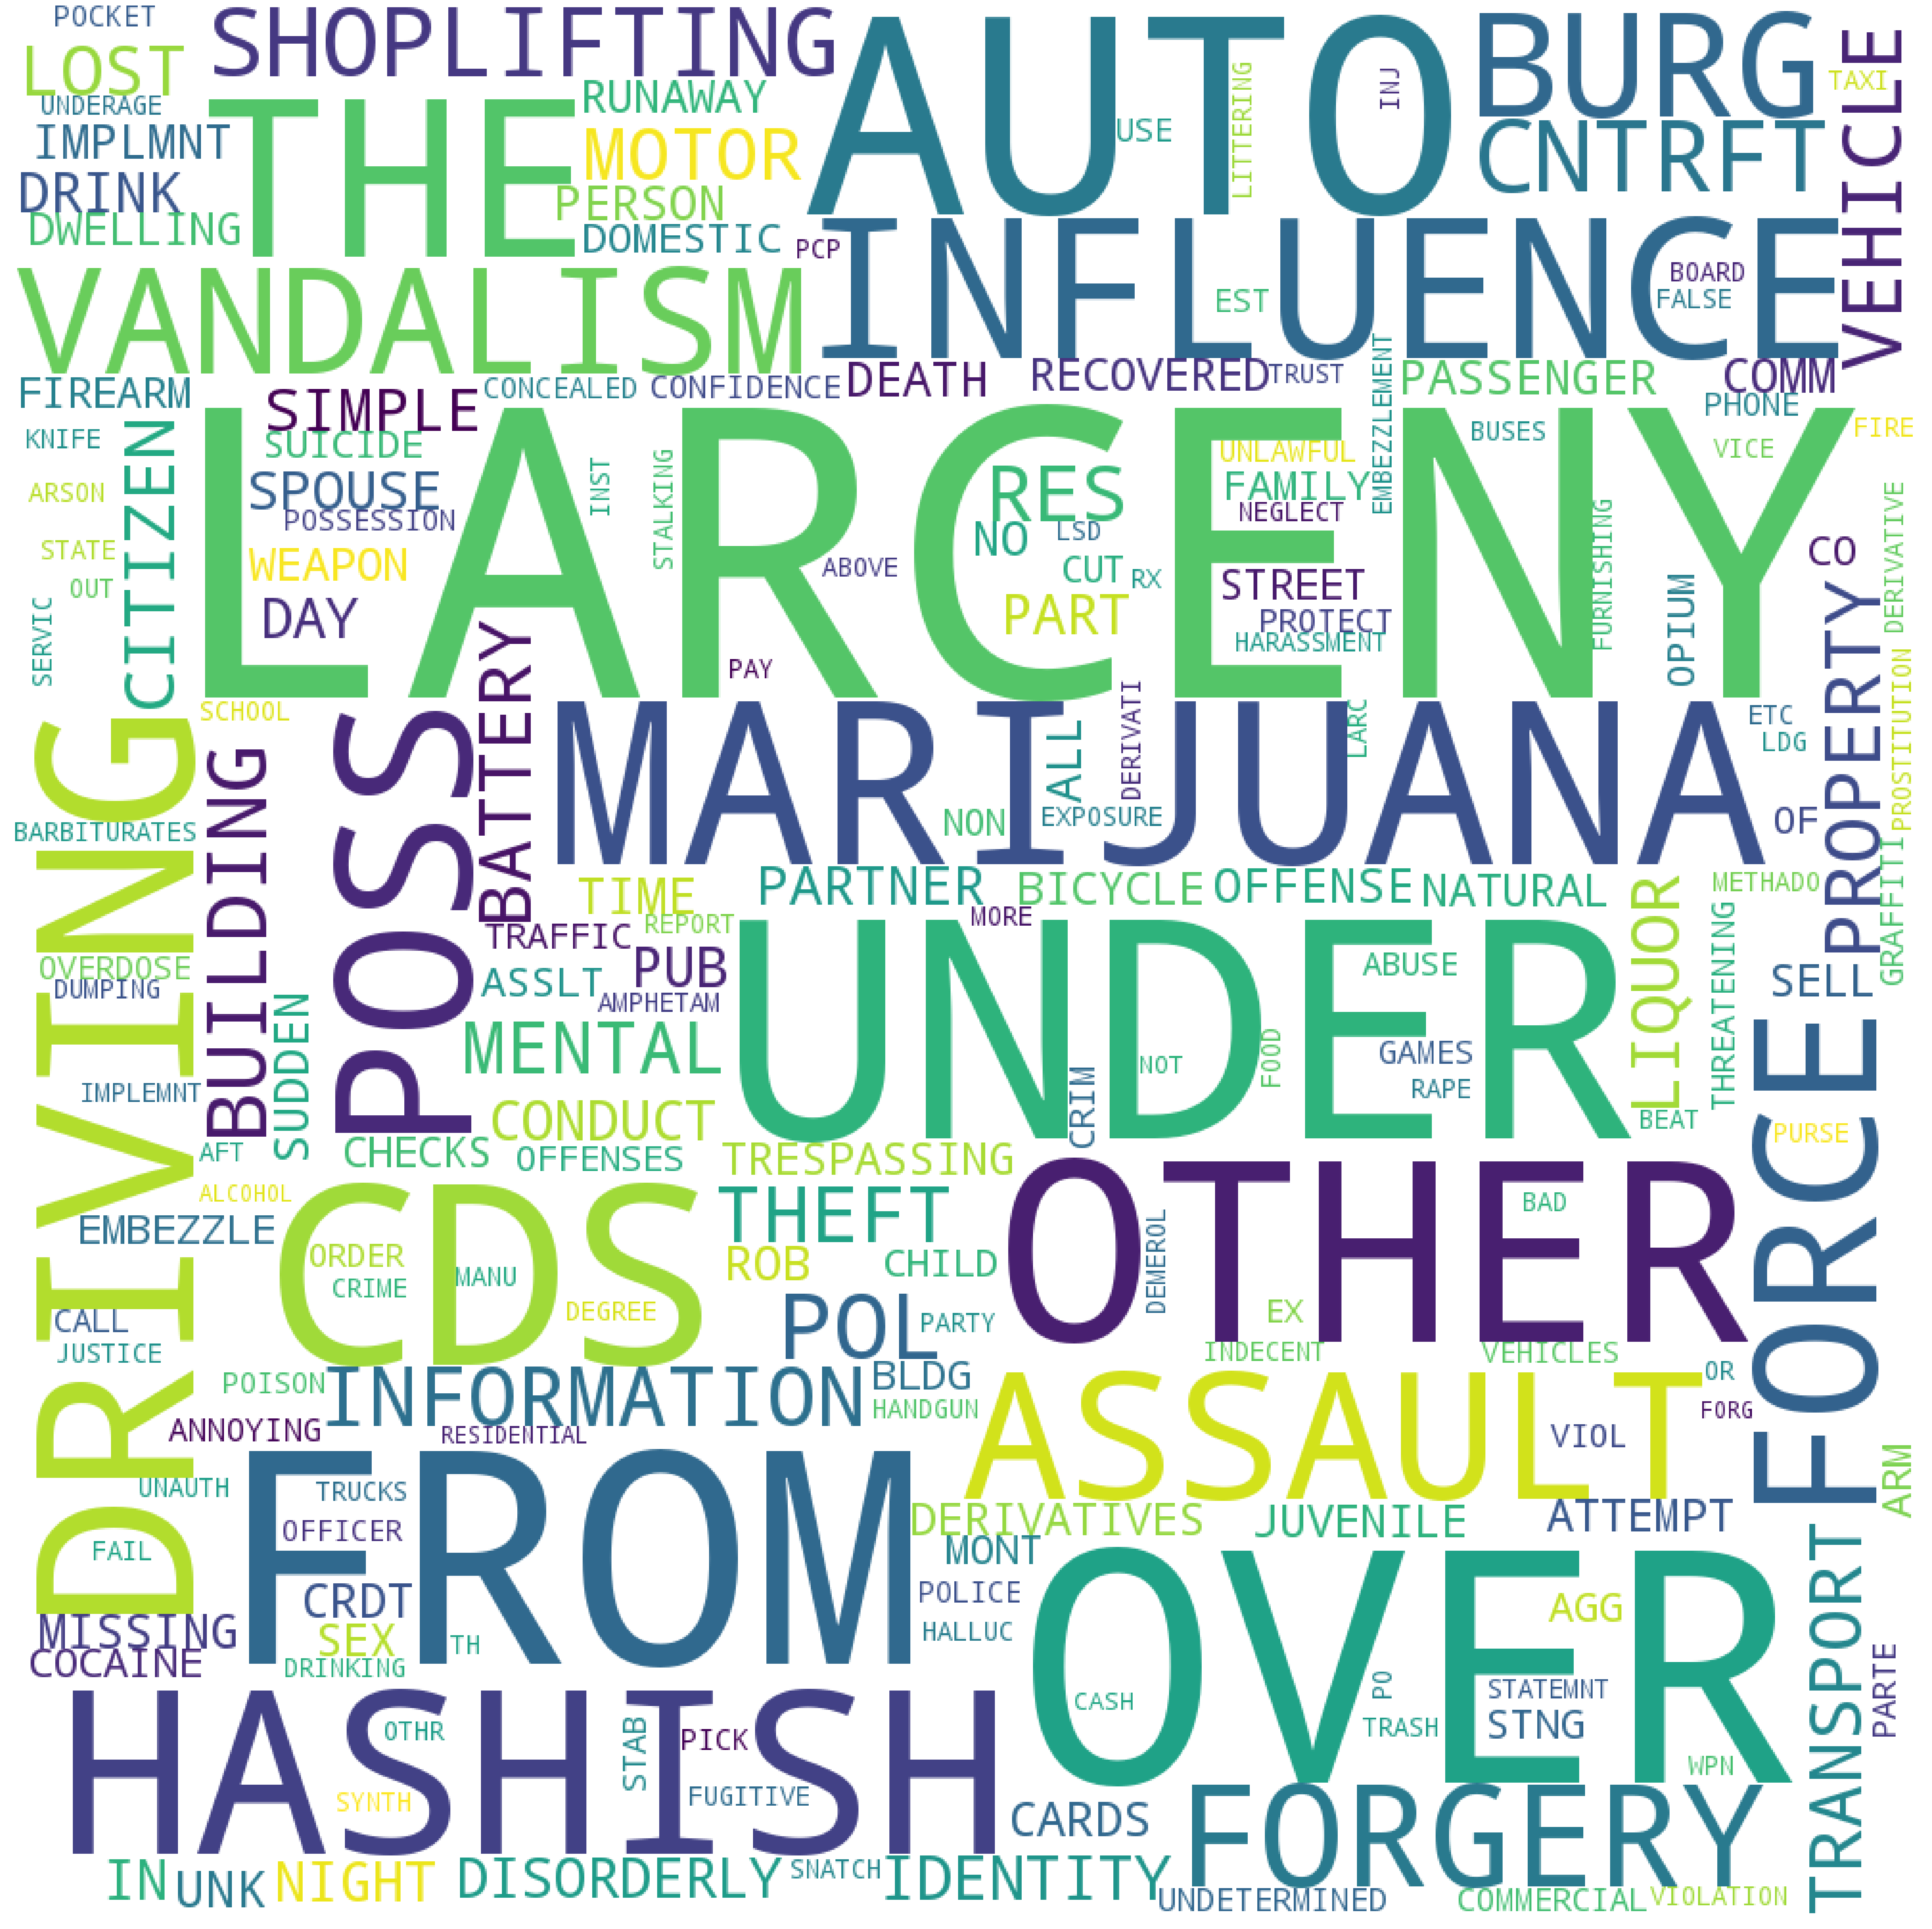

In [39]:
from collections import Counter
import string
#from string import digits
text = crimes['Class Description']

text = text.to_string()
text = ''.join(i for i in text if not i.isdigit())
#text = ''.join(ch for ch in text if ch not in set(string.punctuation))
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
text = text.translate(translator)
text = text.split()

text_dict = Counter(text)

# WordCloud module: https://github.com/amueller/word_cloud
from wordcloud import WordCloud

text = crimes['Class Description'].to_string()
#wordcloud = WordCloud(background_color='white', height=1000, width=2500).generate(text)
wordcloud = WordCloud(background_color='white', height=1000, width=1000).generate_from_frequencies(text_dict)
plt.figure(1,[100,250])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This word cloud makes easy the selection of the targeted words. However, we have also to keep in mind that some
words were abreviated.

In [40]:
violence_words = ['ASSAULT','ROB','WEAPON','FIGHT', 'RAPE', 'STAB', 'KNIFE','FIREARM'] # this list must be increased.
violence_pattern = '|'.join(violence_words)

Based on this search pattern containing words related to violence, we can search for these words in the descriptions and build a new boolen value column to indicate if the police event is somehow related to some kind of violence.

In [41]:
crimes['is_violent'] = crimes['Class Description'].str.contains(violence_pattern, case=False)

Finally, we list only the events with the flag **"is_violent"** set to true.

In [42]:
crimes[crimes['is_violent'] == True]

,Incident ID,CR Number,Dispatch Date / Time,datetime_Dispatch,Class,Class Description,Police District Name,Block Address,City,State,...,datetime_End,Latitude,Longitude,Police District Number,Location,Address Number,number_of_crimes,datetime_Dispatch_date,datetime_Start_date,is_violent
13,200922213,13035028,07/26/2013 10:18:25 PM,2013-07-26 22:18:25,821,SIMPLE ASSAULT - CITIZEN,SILVER SPRING,2100 E RANDOLPH RD,SILVER SPRING,MD,...,2013-05-28 20:00:00,39.064334,-76.968985,3D,"(39.064334220776551, -76.96898520383327)",2100.0,1,2013-07-26,2013-05-27,True
20,200925993,13030560,07/01/2013 03:11:18 AM,2013-07-01 03:11:18,811,ASSAULT & BATTERY - CITIZEN,SILVER SPRING,8200 GEORGIA AVE,SILVER SPRING,MD,...,NaT,38.991646,-77.026611,3D,"(38.991645598561853, -77.026611407863527)",8200.0,1,2013-07-01,2013-07-01,True
84,200926085,13030655,07/01/2013 11:52:31 AM,2013-07-01 11:52:31,341,ROB STNG ARM - STREET,BETHESDA,4800 MONTGOMERY LN,BETHESDA,MD,...,NaT,38.983476,-77.095031,2D,"(38.98347594056618, -77.095030772565565)",4800.0,1,2013-07-01,2013-07-01,True
94,200926101,13030702,07/01/2013 06:16:56 PM,2013-07-01 18:16:56,315,ROB FIREARM - RESIDENTIAL,MONTGOMERY VILLAGE,18400 LOST KNIFE CIR,MONTGOMERY VILLAGE,MD,...,2013-06-30 21:00:00,39.158535,-77.198507,6D,"(39.158535187517721, -77.198507099162867)",18400.0,1,2013-07-01,2013-06-30,True
107,200926123,13030729,07/01/2013 09:07:46 PM,2013-07-01 21:07:46,813,ASSAULT & BATTERY SPOUSE/PARTNER,MONTGOMERY VILLAGE,9700 BRASSIE WAY,MONTGOMERY VILLAGE,MD,...,2013-06-28 11:00:00,39.175277,-77.202006,6D,"(39.175277218793383, -77.202005920168531)",9700.0,1,2013-07-01,2013-06-28,True
110,200926127,13030557,07/01/2013 01:46:47 AM,2013-07-01 01:46:47,811,ASSAULT & BATTERY - CITIZEN,WHEATON,2700 UNIVERSITY BLVD W,SILVER SPRING,MD,...,NaT,39.040003,-77.055465,4D,"(39.04000342569455, -77.05546537991161)",2700.0,1,2013-07-01,2013-07-01,True
113,200926131,13030748,07/02/2013 12:53:06 AM,2013-07-02 00:53:06,811,ASSAULT & BATTERY - CITIZEN,SILVER SPRING,900 ELLSWORTH DR,SILVER SPRING,MD,...,2013-07-02 01:00:00,38.996855,-77.025432,3D,"(38.996854942654743, -77.025432458803962)",900.0,1,2013-07-02,2013-07-02,True
114,200926132,13030742,07/01/2013 11:08:12 PM,2013-07-01 23:08:12,811,ASSAULT & BATTERY - CITIZEN,ROCKVILLE,300 PRETTYMAN DR,ROCKVILLE,MD,...,NaT,39.094253,-77.193956,1D,"(39.094252628626087, -77.193956080337713)",300.0,1,2013-07-01,2013-06-28,True
190,200926227,13030869,07/02/2013 04:59:41 PM,2013-07-02 16:59:41,813,ASSAULT & BATTERY SPOUSE/PARTNER,SILVER SPRING,10200 NEW HAMPSHIRE AVE,SILVER SPRING,MD,...,2013-07-02 16:59:00,39.022323,-76.977492,3D,"(39.022322832476917, -76.977491994186551)",10200.0,1,2013-07-02,2013-07-02,True
211,200926260,13030932,07/02/2013 11:55:06 PM,2013-07-02 23:55:06,332,ROB OTHER WEAPON - COMM,SILVER SPRING,7900 GEORGIA AVE,SILVER SPRING,MD,...,2013-07-02 23:18:00,38.985340,-77.026643,3D,"(38.985339578334042, -77.026643299608324)",7900.0,1,2013-07-02,2013-07-02,True


### 6 Combine Analysis

We are able now to combine our time and location analysis to answer more complex questions. We can determine were and when the majority of crimes are violent. It is important first get knowing the myriad of locations present in this dataset of Montgomery County:

In [43]:
crimes.groupby(['Block Address','City','Police District Name'],as_index=False).sum()[['Block Address','City','Police District Name']]

,Block Address,City,Police District Name
0,1 270_370-SAM EIG RMP,GAITHERSBURG,MONTGOMERY VILLAGE
1,1 ALDERLEAF CT,GERMANTOWN,GERMANTOWN
2,1 ALPEN GREEN CT,BURTONSVILLE,SILVER SPRING
3,1 ANAMOSA CT,DERWOOD,ROCKVILLE
4,1 ANNA CT,GAITHERSBURG,MONTGOMERY VILLAGE
5,1 APEX CT,GAITHERSBURG,MONTGOMERY VILLAGE
6,1 APPLE GROVE RD,SILVER SPRING,SILVER SPRING
7,1 APPLE SEED LN,GAITHERSBURG,MONTGOMERY VILLAGE
8,1 APPLEGRATH CT,GERMANTOWN,GERMANTOWN
9,1 APRICOT CT,GAITHERSBURG,ROCKVILLE


So, there are 8,235 different locations (block addresses). It is possible to check the locations where violent crimes were more likely to occur:

In [44]:
crimes[crimes.is_violent == True]['Block Address'].value_counts()

700  RUSSELL AVE               12
11100  VEIRS MILL RD           11
8800  PINEY BRANCH RD          10
22500  WIMS RD                 10
2700  UNIVERSITY BLVD W        10
900  ELLSWORTH DR               9
13900  CASTLE BLVD              9
13800  CASTLE BLVD              9
13500  GEORGIA AVE              9
8600  PINEY BRANCH RD           9
11200  OAK LEAF DR              8
7100  DEMOCRACY BLVD            8
1  W WATKINS MILL RD            7
1000  QUEBEC TER                7
12300  GEORGIA AVE              7
18300  LOST KNIFE CIR           7
2500  ENNALLS AVE               7
700  CLOPPER RD                 7
7900  GEORGIA AVE               7
11600  LOCKWOOD DR              7
400 N FREDERICK AVE             7
300 N SUMMIT AVE                7
100  EDISON PARK DR             7
600  QUINCE ORCHARD RD          6
9600  LOST KNIFE RD             6
8500  COLESVILLE RD             6
200  PROFESSIONAL DR            6
8400  COLESVILLE RD             6
11200  GRANDVIEW AVE            6
18400  LOST KN

Thus, the **"700  RUSSELL AVE"** is the block with the highest number of violent events.

In [45]:
crimes2 = crimes[crimes.is_violent == True]['Block Address'].value_counts() >= 2
crimes2.value_counts()

False    1008
True      360
Name: Block Address, dtype: int64

And 360 blocks experienced at least 2 violent events.

Similarly, we can figure out which cities in Montgomery County are more violent:

In [46]:
crimes[crimes.is_violent == True]['City'].value_counts()

SILVER SPRING         892
GAITHERSBURG          309
ROCKVILLE             285
GERMANTOWN            201
BETHESDA               99
MONTGOMERY VILLAGE     77
POTOMAC                36
KENSINGTON             35
BURTONSVILLE           29
CLARKSBURG             25
CHEVY CHASE            24
OLNEY                  22
DAMASCUS               21
TAKOMA PARK            20
DERWOOD                12
POOLESVILLE             6
BOYDS                   5
BROOKEVILLE             5
SANDY SPRING            3
DICKERSON               2
ASHTON                  2
Name: City, dtype: int64

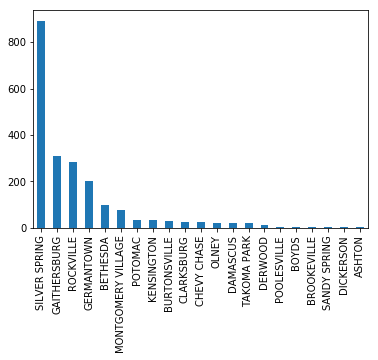

In [47]:
crimes[crimes.is_violent == True]['City'].value_counts().plot(kind='bar')

**"SILVER SPRING"** seems to be undeniably the most violent City in the Montgomery County.